# Bar charts and CSV files

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ages = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]

py_dev = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]

js_dev = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]

# BarChart

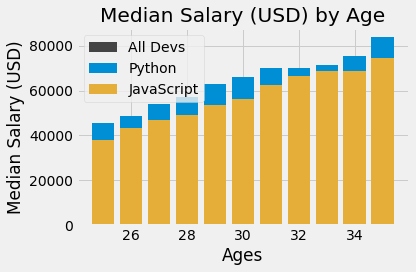

In [3]:
plt.style.use("fivethirtyeight")

plt.bar(ages, dev,    color="#444444", label="All Devs")
plt.bar(ages, py_dev, color="#008fd5", label="Python")
plt.bar(ages, js_dev, color="#e5ae38", label="JavaScript")

plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

plt.legend()

plt.tight_layout()
plt.show()

The bars above are overlapping, which is not what we intended. To fix we need to use numpy

In [4]:
import numpy as np

Now we need to create an index for each x value. We also specify the bar width, to make it simpler to use

In [5]:
x_indexes = np.arange(len(ages))
width = 0.25    # Bar width

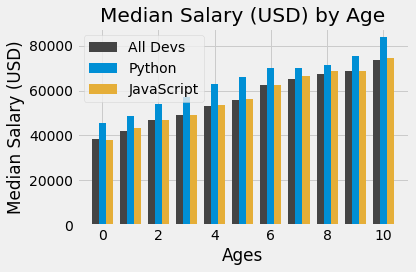

In [6]:
plt.style.use("fivethirtyeight")

plt.bar(x_indexes-width, dev,    width = width, color="#444444", label="All Devs")
plt.bar(x_indexes,       py_dev, width = width, color="#008fd5", label="Python")
plt.bar(x_indexes+width, js_dev, width = width, color="#e5ae38", label="JavaScript")

plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

plt.legend()

plt.tight_layout()
plt.show()

To make the age appear again in the x_axe

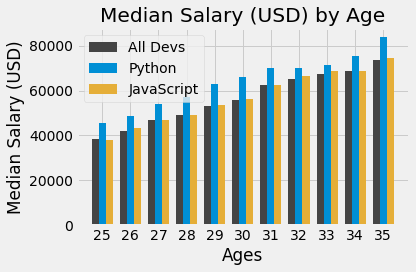

In [7]:
plt.style.use("fivethirtyeight")

plt.bar(x_indexes-width, dev,    width = width, color="#444444", label="All Devs")
plt.bar(x_indexes,       py_dev, width = width, color="#008fd5", label="Python")
plt.bar(x_indexes+width, js_dev, width = width, color="#e5ae38", label="JavaScript")

plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

plt.legend()

plt.xticks(ticks=x_indexes, labels=ages)

plt.tight_layout()
plt.show()

# Read the data from CSV file

First import the csv module

In [8]:
import csv

Read the data

In [9]:
with open('data02.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    row = next(csv_reader)
    print(row)
    print(row['LanguagesWorkedWith'].split(';'))

OrderedDict([('Responder_id', '1'), ('LanguagesWorkedWith', 'HTML/CSS;Java;JavaScript;Python')])
['HTML/CSS', 'Java', 'JavaScript', 'Python']


Using counter module to count the number of times each language appear

In [10]:
# Example for Counter
from collections import Counter

c = Counter(['Python', 'JavaScript'])
print(c)

c.update(['C++', 'Python'])
print(c)

c.update(['C++', 'Python'])
print(c)

Counter({'Python': 1, 'JavaScript': 1})
Counter({'Python': 2, 'JavaScript': 1, 'C++': 1})
Counter({'Python': 3, 'C++': 2, 'JavaScript': 1})


In [11]:
from collections import Counter

In [12]:
with open('data02.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    language_counter = Counter()
    
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))

In [13]:
print(language_counter)

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


15 most common languages

In [14]:
print(language_counter.most_common(15))

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


Split the values

In [15]:
languages = []
popularity = []

for language, value in language_counter.most_common(15):
    languages.append(language)
    popularity.append(value)

Plot these values...

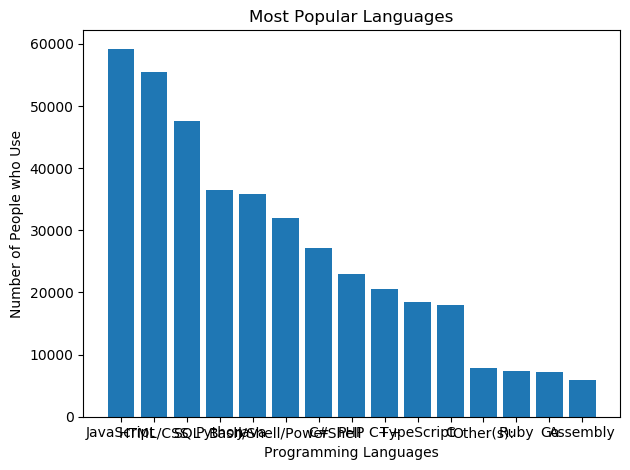

In [16]:
plt.style.use("default")

plt.bar(languages, popularity)

plt.title("Most Popular Languages")
plt.xlabel("Programming Languages")
plt.ylabel("Number of People who Use")

plt.tight_layout()
plt.show()

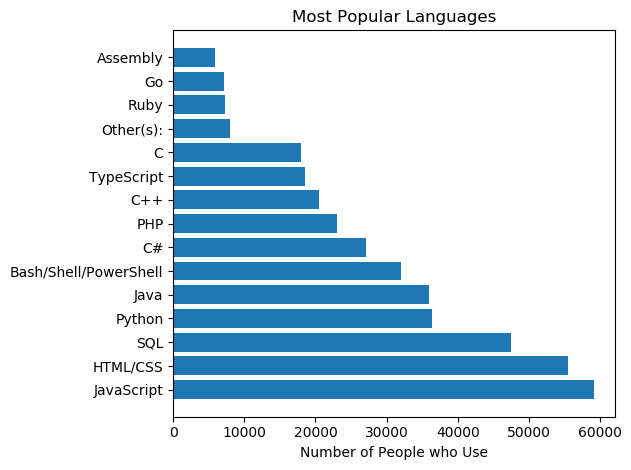

In [17]:
plt.barh(languages, popularity)

plt.title("Most Popular Languages")
#plt.ylabel("Programming Languages")
plt.xlabel("Number of People who Use")

plt.tight_layout()

plt.show()

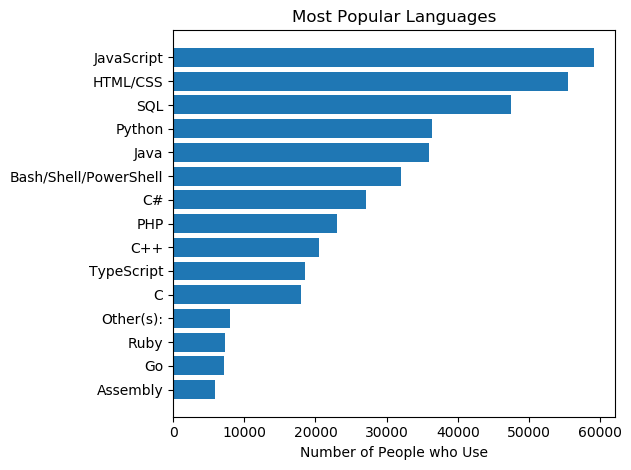

In [18]:
languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Most Popular Languages")
#plt.ylabel("Programming Languages")
plt.xlabel("Number of People who Use")

plt.tight_layout()

plt.show()

Using pandas to read the data from the csv file

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('data02.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

In [21]:
languages = []
popularity = []

for language, value in language_counter.most_common(15):
    languages.append(language)
    popularity.append(value)

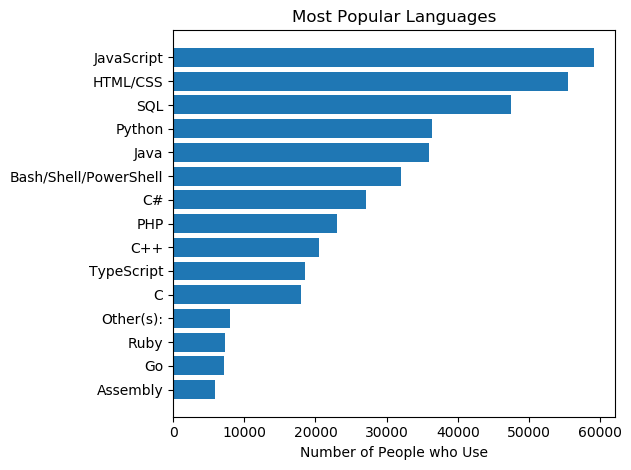

In [22]:
languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Most Popular Languages")
#plt.ylabel("Programming Languages")
plt.xlabel("Number of People who Use")

plt.tight_layout()

plt.show()